## Installing dependencies

In [1]:
# install dependencies: 
# !pip install pyyaml==5.1
# !pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
# import torch, torchvision
# print(torch.__version__, torch.cuda.is_available())
# !gcc --version
# # opencv is pre-installed on colab

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████▍        | 536.6 MB 93.0 MB/s eta 0:00:033    |████▌                           | 103.0 MB 89.0 MB/s eta 0:00:08

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 735.4 MB 9.0 kB/s  eta 0:00:01
     |████████████████████████████████| 12.8 MB 88 kB/s  eta 0:00:01
     |████████████████████████████████| 7.6 MB 6.7 MB/s eta 0:00:01
  Attempting uninstall: torch
    Found existing installation: torch 1.8.0
    Uninstalling torch-1.8.0:
      Successfully uninstalled torch-1.8.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.9.0+cu111
    Uninstalling torchvision-0.9.0+cu111:
      Successfully uninstalled torchvision-0.9.0+cu111
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'ps_roi_align.cpython-37.pyc'
Consider using the `--user` option or check the permissions.

1.7.1+cu101 True
gcc (Debian 8.3.0-6) 8.3.0
Copyright (C) 2018 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
# install detectron2: (Kaggle has CUDA 10.2 + torch 1.7)
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions

# !python -m pip install detectron2 -f \
#   https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.0 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 8.5 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 910 kB/s  eta 0:00:01
     |████████████████████████████████| 74 kB 4.6 MB/s  eta 0:00:01
     |████████████████████████████████| 112 kB 77.4 MB/s eta 0:00:01
  Using cached Cython-0.29.23-cp37-cp37m-manylinux1_x86_64.whl (2.0 MB)
     |████████████████████████████████| 781 kB 74.2 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 74.8 MB/s eta 0:00:01
     |████████████████████████████████| 288 kB 74.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 84.4 MB/s eta 0:00:01
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-py3-none-any.whl size=58542 sha256=83adfe5210c1741b331174b2e71d5a82eb066c613cac6d423bd082ba64808994
  Stored in directory: /home/jupyter/.cache/pip/wheels/

In [1]:
# !pip install gdown

In [1]:
import detectron2
import torch, torchvision
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from cv2 import imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.modeling import build_model
from detectron2.engine import DefaultTrainer
from detectron2.data import (
    build_detection_test_loader,
    build_detection_train_loader,
    DatasetMapper,
)

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
def cv2_imshow(im):
  fig = plt.figure()
  im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  ax1 = fig.add_subplot(111)
  ax1.imshow(im)
  w, h = fig.get_size_inches()
  fig.set_size_inches(w * 2, h * 2)
  plt.show()


## Load data

Detectron2 comes with automatic dataloading for coco-style datasets, we use that to load our train and validation dataset

In [3]:
# import gdown
# train_dataset_link = 'https://drive.google.com/uc?id=1GLhRmlAG9J_ZrTkyvWq0TKPWVGM_b12c'
# gdown.download(train_dataset_link)
# import gdown
# gdown.download("https://drive.google.com/uc?id=1GfNY6qMb4d0kxIUG3UqLxDx9Khzixgcq")

In [4]:
# !unzip -q challenge_5_website.zip
# !rm challenge_5_training_dataset.zip

In [5]:
# import gdown
# extended_dataset_link = 'https://drive.google.com/uc?id=1qg-90B91W7UYDB7djtWevF-LeJ4gpekd'
# gdown.download(extended_dataset_link)

In [6]:
# !unzip -q images
# !rm images.zip
# !mv -v c3_website/images/* data/c5_data/c1_c3_c5_hiddenegg_dataset/images

In [7]:
## Extended dataset

# base_folder = './data' # Change this path to your folder for this competition

# extended_dataset = os.path.join(base_folder,"extended_training_images")
# extended_dataset_json = os.path.join(base_folder,"extended_train.json")
# provided_dataset = os.path.join(base_folder,"c1_release")

In [8]:
## Standard dataset

# from detectron2.data.datasets import register_coco_instances
# register_coco_instances("2train_dataset",{},"data/c1_release/train.json","data/c1_release/images")

# register_coco_instances("val_dataset",{},"c1_release/val.json","c1_release/images")

In [9]:
## Challenge 3 dataset

from detectron2.data.datasets import register_coco_instances
c3_folder = "data/c5_data/c1_c3_c5_hiddenegg_dataset"
register_coco_instances("train_dataset",{},os.path.join(c3_folder,"train.json"),os.path.join(c3_folder,"images"))
register_coco_instances("val_dataset",{},os.path.join(c3_folder,"val.json"),os.path.join(c3_folder,"images"))


## Training loop

We use the default trainer from detectron, but this should/could be changed.

Default optimizer: SGD
Default scheduler: "WarmupMultiStepLR"
Default augmentations are printed below. (Todo: extend with albumentations -> copypaste,mixups)

In [26]:


cfg = get_cfg()
# cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("train_dataset",)
cfg.DATASETS.TEST = ("val_dataset",)

cfg.DATALOADER.NUM_WORKERS = 2
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.MODEL.WEIGHTS = "backups/C5_baseline_25k.pth"

cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 11500    
cfg.SOLVER.LR_SCHEDULER_NAME = "WarmupMultiStepLR"
cfg.SOLVER.STEPS = (9500,)  # The iteration number to decrease learning rate by gamma (currently set to 0.1)
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 8 
cfg.OUTPUT_DIR = './output_c5'
cfg.TEST.EVAL_PERIOD = 0
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

In [27]:
from detectron2.data.transforms import RandomApply,RandomBrightness,RandomCrop,RandomFlip, RandomRotation,ResizeShortestEdge,RandomLighting


# augmentations = [
# #                 RandomApply(RandomBrightness(0.7,1.3)),
# #                 RandomApply(RandomLighting(0.6)),
# #                 RandomApply(RandomCrop("relative_range",(0.8,0.8))),
#                 ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'),
#                 RandomFlip(horizontal=True),
#                 RandomApply(RandomRotation([0,30])),
#                 ]

In [28]:
class Trainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name,output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        return COCOEvaluator(dataset_name, ("bbox",), False, output_dir=cfg.OUTPUT_DIR)
    
    @classmethod
    def build_train_loader(cls, cfg):
        augmentations = [
                RandomApply(RandomBrightness(0.7,1.3)),
                RandomApply(RandomLighting(0.6)),
                RandomApply(RandomCrop("relative_range",(0.8,0.8))),
                ResizeShortestEdge(short_edge_length=(240,320,640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'),
                RandomFlip(horizontal=True),
                ]
        mapper = DatasetMapper(cfg, is_train=True,augmentations=augmentations)
        return build_detection_train_loader(cfg, mapper=mapper)

In [29]:

# cfg.MODEL.WEIGHTS = os.path.join("output", "model_final.pth")
trainer = Trainer(cfg) 
trainer.resume_or_load(resume=True)
trainer.train()

[06/23 09:16:18 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

## Run this if you need to load a model

In [13]:
# cfg.SOLVER.MAX_ITER = 5000
# cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
# cfg.SOLVER.STEPS=(30000,)
# cfg.MODEL.WEIGHTS = os.path.join(base_folder, "resnet101.pth")
# trainer = DefaultTrainer(cfg) 
# trainer.resume_or_load(resume=False)
# trainer.train()

## Evaluate our models

In [26]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
# gdown.download("https://drive.google.com/uc?id=1ttfnH3FP4Le6ngb9Yzn5DELWI-0sIcmq")
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold
predictor = DefaultPredictor(cfg)

In [29]:
def get_image_ids(img_dir):
    json_file = os.path.join(img_dir, "labels.json")
    f = open(json_file)
    data = json.load(f)
    imgids = [];
    for i in data["images"]:
      imgids.append("{}/{}/{}".format(img_dir,'images',i['file_name']))
    return imgids

In [30]:
## Get some sample images

from detectron2.utils.visualizer import ColorMode
test_dataset_path = "data/c5_data/challenge_5_training_dataset"
imgids = get_image_ids(test_dataset_path)
for d in random.sample(imgids, 3):    
    im = cv2.imread(d)
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   scale=0.5, 
    )
    print(outputs["instances"].to("cpu"))
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

AttributeError: 'NoneType' object has no attribute 'shape'

## Evaluate on our val set

In [31]:

model = build_model(cfg)
evaluator = COCOEvaluator("val_dataset", ("bbox",), False, output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, "val_dataset")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

[06/23 07:07:52 d2.data.datasets.coco]: Loaded 789 images in COCO format from data/c5_data/c1_c3_c5_hiddenegg_dataset/val.json
[06/23 07:07:52 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/23 07:07:52 d2.data.common]: Serializing 789 elements to byte tensors and concatenating them all ...
[06/23 07:07:52 d2.data.common]: Serialized dataset takes 0.24 MiB
[06/23 07:07:52 d2.evaluation.evaluator]: Start inference on 789 images
[06/23 07:07:53 d2.evaluation.evaluator]: Inference done 11/789. 0.0992 s / img. ETA=0:01:18
[06/23 07:07:58 d2.evaluation.evaluator]: Inference done 62/789. 0.0985 s / img. ETA=0:01:12


KeyboardInterrupt: 

In [17]:
evaluator = COCOEvaluator("train_dataset", ("bbox",), False, output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, "train_dataset")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

[06/23 08:57:29 d2.data.datasets.coco]: Loaded 8690 images in COCO format from data/c5_data/c1_c3_c5_hiddenegg_dataset/train.json
[06/23 08:57:29 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[06/23 08:57:29 d2.data.common]: Serializing 8690 elements to byte tensors and concatenating them all ...
[06/23 08:57:29 d2.data.common]: Serialized dataset takes 2.64 MiB
[06/23 08:57:29 d2.evaluation.evaluator]: Start inference on 8690 images
[06/23 08:57:31 d2.evaluation.evaluator]: Inference done 11/8690. 0.0979 s / img. ETA=0:14:21
[06/23 08:57:36 d2.evaluation.evaluator]: Inference done 62/8690. 0.0975 s / img. ETA=0:14:15
[06/23 08:57:41 d2.evaluation.evaluator]: Inference done 115/8690. 0.0960 s / img. ETA=0:13:56
[06/23 08:57:46 d2.evaluation.evaluator]: Inference done 167/8690. 0.0955 s / img. ETA=0:13:47
[06/23 08:57:51 d2.evaluation.evaluator]: Inference done 218/8690. 

## Make predictions on test set

IMPORTANT! The labels that the model trained on is indexed from 0 for some reason so we add 1 to the labels in the final function that saves the predictions

In [32]:
# This is a pretrained resnet101 to check that prediction code works
# gdown.download('https://drive.google.com/uc?id=1Ljiui_7N6ZpelGLrsajf2eNDCIf3BSQH')
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR,"model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set a custom testing threshold
predictor = DefaultPredictor(cfg)

In [33]:
# import gdown
# gdown.download('https://drive.google.com/uc?id=1dDQauhE6w_KcLPKkeRwb-ejx97EvyAJy')

# test_path = os.path.join("./", "challenge_3_test_dataset.zip") # zip file for training dataset
# # unzip the training dataset
# !unzip -q $test_path

In [41]:
til_test_root = "data/c5_data/challenge_5_test_dataset" # extracted testing images path
test_img_root = os.path.join(til_test_root, "images")
img_dir = os.scandir(test_img_root)

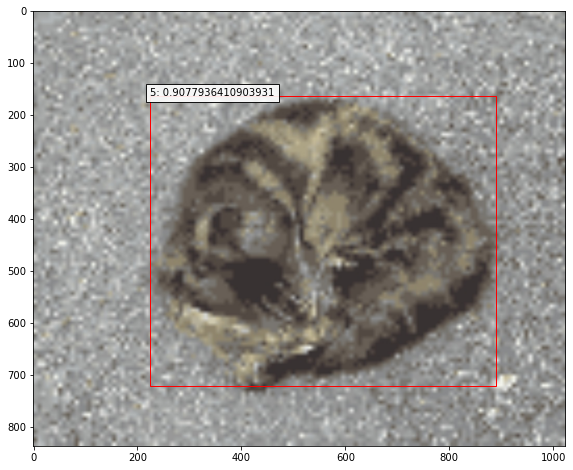

In [75]:
## Predict some images and check that it makes sense

import matplotlib.patches as patches
import matplotlib.pyplot as pyplot

filename = next(img_dir).path
im = cv2.imread(filename)
det_threshold = 0.5



  
# do the prediction
with torch.no_grad():
    outputs = predictor(im)
    img_preds = outputs['instances'].get_fields()
    
fig = plt.figure()
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
ax1 = fig.add_subplot(111)
ax1.imshow(im)

for i in range(len(img_preds["pred_boxes"])):
    x1, y1, x2, y2 = img_preds["pred_boxes"][i].tensor.tolist()[0]
    label = int(img_preds["pred_classes"][i])
    score = float(img_preds["scores"][i])
  
    #filter out non-confident detections
    if score > det_threshold:
        rect = patches.Rectangle((x1,y1),(x2-x1),(y2-y1),linewidth=1, edgecolor='r', facecolor='none')
        text = f'{label+1}: {score}'
        pyplot.text(x1,y1,text, bbox=dict(facecolor='white',alpha=0.9))
        ax1.add_patch(rect)

w, h = fig.get_size_inches()
fig.set_size_inches(w * 2, h * 2)   
plt.show()

In [36]:
## Generate detections
from tqdm.notebook import tqdm
img_dir = os.scandir(test_img_root)
detections = []
count = 0
with torch.no_grad():
    for image in tqdm(img_dir):
        count+=1
        img_id = int(image.name.split('.')[0])
        img = cv2.imread(image.path)
        output = predictor(img)
        preds = output['instances'].get_fields()

        for i in range(len(preds["pred_boxes"])):
            x1, y1, x2, y2 = preds["pred_boxes"][i].tensor.tolist()[0]
            label = int(preds["pred_classes"][i])+1
            score = float(preds["scores"][i])

            left = int(x1)
            top = int(y1)
            width = int(x2 - x1)
            height = int(y2 - y1)

            detections.append({'image_id':img_id, 'category_id':label, 'bbox':[left, top, width, height], 'score':score})

print(f'{count} images done')

0it [00:00, ?it/s]

400 images done


In [37]:
test_pred_json = os.path.join("./", "challenge_5_team_hman.json")
with open(test_pred_json, 'w') as f:
    json.dump(detections, f)

In [38]:
f = open(test_pred_json)
data = json.load(f)

In [39]:
len(data)

574

Categories {1: 'Cat', 2: 'Dog', 3: 'Bird', 4: 'Chicken', 5: 'Snake'}

## Visualizing the training data and  checking for errors

In [21]:
import os 
import json
# img_dir = os.scandir("extended_training_images")
filepath = "data/c5_data/ext_croc_dataset/train.json"
f = open(filepath)

data = json.load(f)

In [22]:
counts = [0 for i in range(8)]
for i in data["annotations"]:
    counts[i['category_id']-1]+=1
print("Cat, Dog, Bird, Chicken, Snake, Elephant, Dinosaur")
print(counts)

IndexError: list index out of range

In [23]:
from tqdm.notebook import tqdm
seen = []
dupes = []
for i in tqdm(data["annotations"]):
    if i['id'] in seen:
        dupes.append(i['id'])
    else:
        seen.append(i['id'])
        


  0%|          | 0/12133 [00:00<?, ?it/s]

In [25]:
[i for i in data["annotations"] if i["category_id"] > 8]

[{'bbox': [84.8, 88.000002048, 939.2, 592.0000235519999],
  'category_id': 9,
  'area': 556006.4221200383,
  'iscrowd': 0,
  'segmentation': [],
  'id': 12104,
  'image_id': 8273},
 {'bbox': [228.05899264, 173.77212474, 644.90853376, 359.63272795],
  'category_id': 9,
  'area': 231930.21527434347,
  'iscrowd': 0,
  'segmentation': [],
  'id': 12105,
  'image_id': 8274},
 {'bbox': [80.0, 270.39999744, 944.0, 313.60002815999997],
  'category_id': 9,
  'area': 296038.42658304,
  'iscrowd': 0,
  'segmentation': [],
  'id': 12106,
  'image_id': 8275},
 {'bbox': [0.0, 0.0, 1024.0, 768.0],
  'category_id': 9,
  'area': 786432.0,
  'iscrowd': 0,
  'segmentation': [],
  'id': 12107,
  'image_id': 8276},
 {'bbox': [0.0, 83.108406445, 1020.97937408, 427.630524355],
  'category_id': 9,
  'area': 436601.94509347004,
  'iscrowd': 0,
  'segmentation': [],
  'id': 12108,
  'image_id': 8277},
 {'bbox': [297.53393152, 287.10176834000004, 726.46606848, 380.78760795999995],
  'category_id': 9,
  'area': 2

In [40]:
imdata=data["images"]
keyimdata = {i['file_name']:{'width':i['width'], 'height':i['height']} for i in imdata}

In [34]:
import cv2
from tqdm.notebook import tqdm
img_dir = os.scandir("data/c3_data/c1_c3_train_dataset/images")
for im in tqdm(imdata):
    img = cv2.imread("data/c3_data/cannon_v2_dataset/images/"+im['file_name'])
    height, width, channels = img.shape
    jsonstats = keyimdata[im['file_name']]
    if jsonstats['width'] != width or jsonstats['height'] != height:
        print(im,jsonstats)

  0%|          | 0/18968 [00:00<?, ?it/s]

In [41]:
 [i for i in imdata if i["file_name"]=="0b61cfd27ff3b3bc.jpg"]

[{'flickr_url': '',
  'coco_url': '',
  'license': 0,
  'date_captured': 0,
  'file_name': '0b61cfd27ff3b3bc.jpg',
  'width': 4000,
  'height': 6000,
  'id': 10962}]

In [42]:
img = cv2.imread("data/c3_data/cannon_v2_dataset/images/0b61cfd27ff3b3bc.jpg")
img.shape

(6000, 4000, 3)

[{'bbox': [0.0, 2880.0, 1797.372, 1747.5], 'category_id': 2, 'area': 3140907.5700000003, 'iscrowd': 0, 'segmentation': [], 'id': 17367, 'image_id': 10962}, {'bbox': [2150.092, 3165.0, 1669.7960000000003, 2193.75], 'category_id': 2, 'area': 3663114.9750000006, 'iscrowd': 0, 'segmentation': [], 'id': 17368, 'image_id': 10962}, {'bbox': [1257.036, 3195.0, 833.02, 1968.75], 'category_id': 2, 'area': 1640008.125, 'iscrowd': 0, 'segmentation': [], 'id': 17369, 'image_id': 10962}]


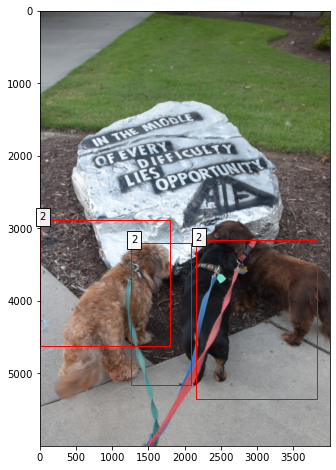

In [44]:
import random
import matplotlib.patches as patches
import matplotlib.pyplot as pyplot

for i in random.sample(data["images"],1):
    i = [j for j in imdata if j["file_name"]=="0b61cfd27ff3b3bc.jpg"][0]
    im = cv2.imread("data/c3_data/cannon_v2_dataset/images/"+i['file_name'])
    img_id = i['id']
    boxes = [j for j in data['annotations'] if j['image_id'] == img_id]
    print(boxes)
    fig = plt.figure()
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    ax1 = fig.add_subplot(111)
    ax1.imshow(im)
    for box in boxes:
        x1,y1,width,height = box['bbox']
        label = box['category_id']
        rect = patches.Rectangle((x1,y1),width,height,linewidth=1, edgecolor='r', facecolor='none')
        text = f'{label}'
        pyplot.text(x1,y1,text, bbox=dict(facecolor='white',alpha=0.9))
        ax1.add_patch(rect)
    w, h = fig.get_size_inches()
    fig.set_size_inches(w * 2, h * 2)   
    plt.show()